# Investigating Cyclistic Bike Share Data

### Let's define the Questions we would like to answer through this project

1) What kind of people cycle the most?


2) What types of bikes do they mostly use?


3) Which month does the riders prefer for their rides?


4) How long does the rides last?

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Read Datasets

In [2]:
d1=pd.read_csv("/kaggle/input/cyclistic-bike-share/202104-divvy-tripdata.csv")
d2=pd.read_csv("/kaggle/input/cyclistic-bike-share/202105-divvy-tripdata.csv")
d3=pd.read_csv("/kaggle/input/cyclistic-bike-share/202106-divvy-tripdata.csv")
d4=pd.read_csv("/kaggle/input/cyclistic-bike-share/202107-divvy-tripdata.csv")
d5=pd.read_csv("/kaggle/input/cyclistic-bike-share/202108-divvy-tripdata.csv")
d6=pd.read_csv("/kaggle/input/cyclistic-bike-share/202109-divvy-tripdata.csv")
d7=pd.read_csv("/kaggle/input/cyclistic-bike-share/202110-divvy-tripdata.csv")
d8=pd.read_csv("/kaggle/input/cyclistic-bike-share/202111-divvy-tripdata.csv")
d9=pd.read_csv("/kaggle/input/cyclistic-bike-share/202112-divvy-tripdata.csv")
d10=pd.read_csv("/kaggle/input/cyclistic-bike-share/202201-divvy-tripdata.csv")
d11=pd.read_csv("/kaggle/input/cyclistic-bike-share/202202-divvy-tripdata.csv")
d12=pd.read_csv("/kaggle/input/cyclistic-bike-share/202203-divvy-tripdata.csv")

In [3]:
dataframes=[d1, d2, d3, d4, d5, d6, d7, d8, d9, d10, d11, d12]

## Combine all dataframes into one dataset called data

In [4]:
data = pd.concat(dataframes)
display(data)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,6C992BD37A98A63F,classic_bike,2021-04-12 18:25:36,2021-04-12 18:56:55,State St & Pearson St,TA1307000061,Southport Ave & Waveland Ave,13235,41.897448,-87.628722,41.948150,-87.663940,member
1,1E0145613A209000,docked_bike,2021-04-27 17:27:11,2021-04-27 18:31:29,Dorchester Ave & 49th St,KA1503000069,Dorchester Ave & 49th St,KA1503000069,41.805772,-87.592464,41.805772,-87.592464,casual
2,E498E15508A80BAD,docked_bike,2021-04-03 12:42:45,2021-04-07 11:40:24,Loomis Blvd & 84th St,20121,Loomis Blvd & 84th St,20121,41.741487,-87.658410,41.741487,-87.658410,casual
3,1887262AD101C604,classic_bike,2021-04-17 09:17:42,2021-04-17 09:42:48,Honore St & Division St,TA1305000034,Southport Ave & Waveland Ave,13235,41.903119,-87.673935,41.948150,-87.663940,member
4,C123548CAB2A32A5,docked_bike,2021-04-03 12:42:25,2021-04-03 14:13:42,Loomis Blvd & 84th St,20121,Loomis Blvd & 84th St,20121,41.741487,-87.658410,41.741487,-87.658410,casual
...,...,...,...,...,...,...,...,...,...,...,...,...,...
284037,E23BE3DB740BE3B4,docked_bike,2022-03-13 16:31:03,2022-03-13 16:39:32,Michigan Ave & Oak St,13042,Streeter Dr & Grand Ave,13022,41.900960,-87.623777,41.892278,-87.612043,casual
284038,15AF71F3220F2A75,docked_bike,2022-03-09 06:56:02,2022-03-09 07:42:14,Broadway & Barry Ave,13137,Ravenswood Ave & Berteau Ave,TA1309000018,41.937582,-87.644098,41.957921,-87.673567,casual
284039,9C4CE6CC19F8225B,electric_bike,2022-03-09 15:55:26,2022-03-09 16:08:54,NaN,NaN,Albany Ave & Montrose Ave,15621,41.940000,-87.710000,41.961041,-87.705866,member
284040,F4E136DEF696F3AE,electric_bike,2022-03-21 16:12:44,2022-03-21 16:18:24,NaN,NaN,Larrabee St & Division St,KA1504000079,41.910000,-87.650000,41.903486,-87.643353,member


## Exploratory Data Analysis (EDA)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5723532 entries, 0 to 284041
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 611.3+ MB


In [6]:
data.describe()

,start_lat,start_lng,end_lat,end_lng
count,5.723532e+06,5.723532e+06,5.718816e+06,5.718816e+06
mean,4.190065e+01,-8.764629e+01,4.190091e+01,-8.764650e+01
std,4.649557e-02,2.974885e-02,4.657768e-02,2.935251e-02
min,4.164000e+01,-8.784000e+01,4.139000e+01,-8.897000e+01
25%,4.188132e+01,-8.766014e+01,4.188132e+01,-8.766028e+01
50%,4.189862e+01,-8.764194e+01,4.189897e+01,-8.764288e+01
75%,4.192889e+01,-8.762775e+01,4.192914e+01,-8.762775e+01
max,4.563503e+01,-7.379648e+01,4.216812e+01,-8.749000e+01


In [7]:
data.shape

(5723532, 13)

In [8]:
data.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    745376
start_station_id      745373
end_station_name      796247
end_station_id        796247
start_lat                  0
start_lng                  0
end_lat                 4716
end_lng                 4716
member_casual              0
dtype: int64

## Data Processing

In [9]:
# Since we don't need the start and end stations names and ids, we will remove them

df = data.drop(columns=['start_station_name', 'start_station_id', 'end_station_name', 'end_station_id'])

In [10]:
# Let's drop duplicates too

df = df.drop_duplicates()

In [11]:
# We will also drop the end_lat and end_lng rows that have null values since they won't benefit us

df = df.dropna()

In [12]:
# Let's check the null values now

df.isnull().sum()

ride_id          0
rideable_type    0
started_at       0
ended_at         0
start_lat        0
start_lng        0
end_lat          0
end_lng          0
member_casual    0
dtype: int64

In [13]:
# Now let's see how many columns and rows are remaining

df.shape

(5718816, 9)

In [14]:
# Let's check columns data types

df.dtypes

ride_id           object
rideable_type     object
started_at        object
ended_at          object
start_lat        float64
start_lng        float64
end_lat          float64
end_lng          float64
member_casual     object
dtype: object

> ## Let's see What kind of people cycle the most

In [15]:
df["member_casual"].value_counts()

member_casual
member    3175924
casual    2542892
Name: count, dtype: int64

### Let's plot these counts

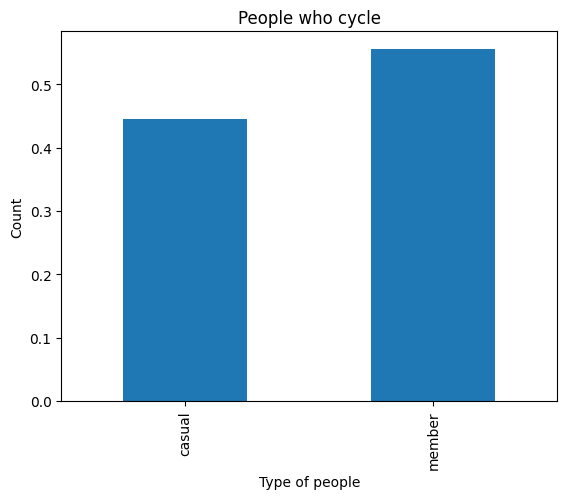

In [16]:
# Using Matplotlib

fig, ax = plt.subplots()
df["member_casual"].value_counts(normalize = True, ascending = True).plot(ax=ax, kind='bar')
plt.title("People who cycle")
plt.xlabel("Type of people")
plt.ylabel("Count")
plt.show()

We can see that members cycle more frequently than casuals, however, the difference between them is not that big.

> ## Let's see what types of bikes have been used the most

In [17]:
df["rideable_type"].value_counts()

rideable_type
classic_bike     3246440
electric_bike    2168852
docked_bike       303524
Name: count, dtype: int64

### Let's plot these counts

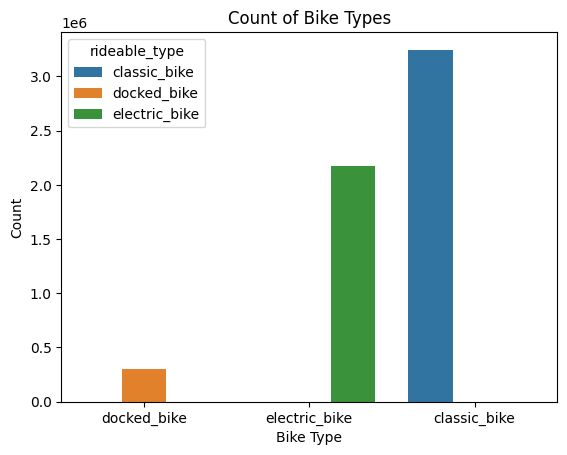

In [18]:
# Using Seaborn

ax = sns.countplot(x = "rideable_type",data = df, hue = "rideable_type", 
                   order = df['rideable_type'].value_counts(normalize=True, ascending = True).index)
plt.title("Count of Bike Types")
plt.xlabel("Bike Type")
plt.ylabel("Count")
plt.show()

We can observe that the majority of people opted for classic bikes for their rides, while the fewest chose docked bikes. This suggests that companies may need to consider reducing their production of docked bikes.

> ## Let's see which month does the riders prefer for their rides


In [19]:
df["month"] = pd.to_datetime(df['started_at']).dt.month
month_counts = df['month'].value_counts().sort_index()
month_counts

month
1     103684
2     115532
3     283776
4     336963
5     531181
6     728878
7     821679
8     803646
9     755552
10    630742
11    359787
12    247396
Name: count, dtype: int64

### Let's plot these counts

In [28]:
# Using Plotly


# Use a custom mapping to display month names in full
month_names = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}

# Create a horizontal bar plot using Plotly Express with custom colors
fig = px.bar(x=month_counts.values, y=[month_names[i] for i in month_counts.index], orientation='h', color=[month_names[i] for i in month_counts.index], color_discrete_sequence=px.colors.qualitative.Set3)

# Customize the plot's appearance (optional)
fig.update_layout(
    title='Frequency of Rides each Month',
    xaxis_title='Frequency',
    yaxis_title='Month'
)

# Add frequency values as text labels beside the bars
fig.update_traces(textposition='outside', text=month_counts.values)

# Show the plot
fig.show()

We can conclude that most of the rides happened in July, which, in turn, makes it the most suitable month for organizing cycling marathons or events.

> ## Let's see how long does the rides last


In [30]:
df["Ride Duration"] = ((pd.to_datetime(df['ended_at']) - pd.to_datetime(df['started_at'])).dt.total_seconds() / 60).round(2)


In [33]:
df["Ride Duration"]

0           31.32
1           64.30
2         5697.65
3           25.10
4           91.28
           ...   
284037       8.48
284038      46.20
284039      13.47
284040       5.67
284041       9.98
Name: Ride Duration, Length: 5718816, dtype: float64

In [34]:
max(df["Ride Duration"])

55944.15

In [37]:
np.mean(abs(df["Ride Duration"]))

20.503306570800667

We can observe that the average bike ride duration is approximately 20 minutes, which can be helpful in determining the most suitable timing for a race or marathon.